### Урок 8
#### Дисперсионный анализ. Метод главных компонент. Логистическая регрессия

#### Задача 1
Используя данные о хоккеистах, проверьте, является ли среди хоккеистов из Финляндии, Норвегии и Дании значимым отличие: а) роста, б) BMI.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [11]:
data = pd.read_csv('hockey_players.csv', encoding = 'unicode_escape', engine ='python')
print('dataset shape: {}'.format(data.shape))
data.head()

dataset shape: (6292, 13)


,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [35]:
data.country.unique()

array(['RUS', 'AUT', 'BLR', 'CAN', 'CZE', 'FIN', 'GER', 'ITA', 'JPN',
       'LAT', 'NOR', 'SUI', 'SVK', 'SWE', 'UKR', 'USA', 'POL', 'SLO',
       'DEN', 'FRA', 'KAZ', 'HUN'], dtype=object)

==count observations==
NOR: 290	FIN: 396	DEN: 340


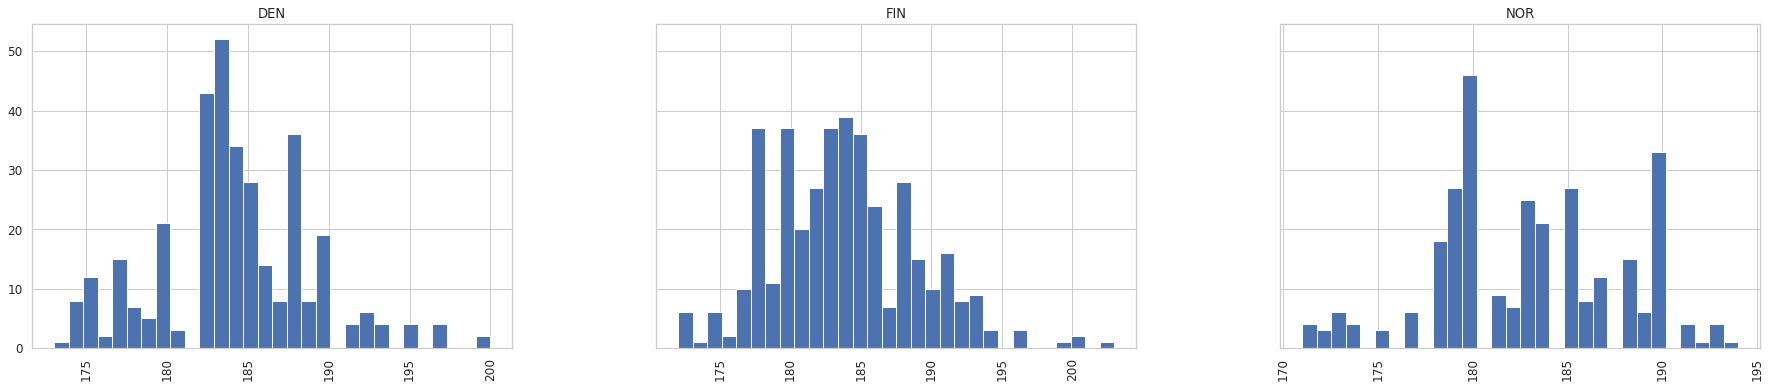

In [78]:
countries = ["NOR", "FIN", "DEN"] # for hist plotting
norway_heights = data.query('country == "NOR"').height
finland_heights = data.query('country == "FIN"').height
denmark_heights = data.query('country == "DEN"').height

all_heights = (norway_heights, finland_heights, denmark_heights)
print('==count observations==\nNOR: {}\tFIN: {}\tDEN: {}'
.format(*[len(series) for series in all_heights]))

data.query('country in @countries')[['country', 'height']] \
    .hist(by='country', bins=30, figsize=(30, 6), 
          layout=(1, 3), sharey=True);

In [68]:
alpha = 0.05
f_result = stats.f_oneway(*all_heights)

H0 = """Различия в росте спортсменов не являются статистически значимыми"""
H1 = """Различия в росте спортсменов статистически значимы"""

print(H0 if alpha < f_result.pvalue else H1)

Различия в росте спортсменов статистически значимы


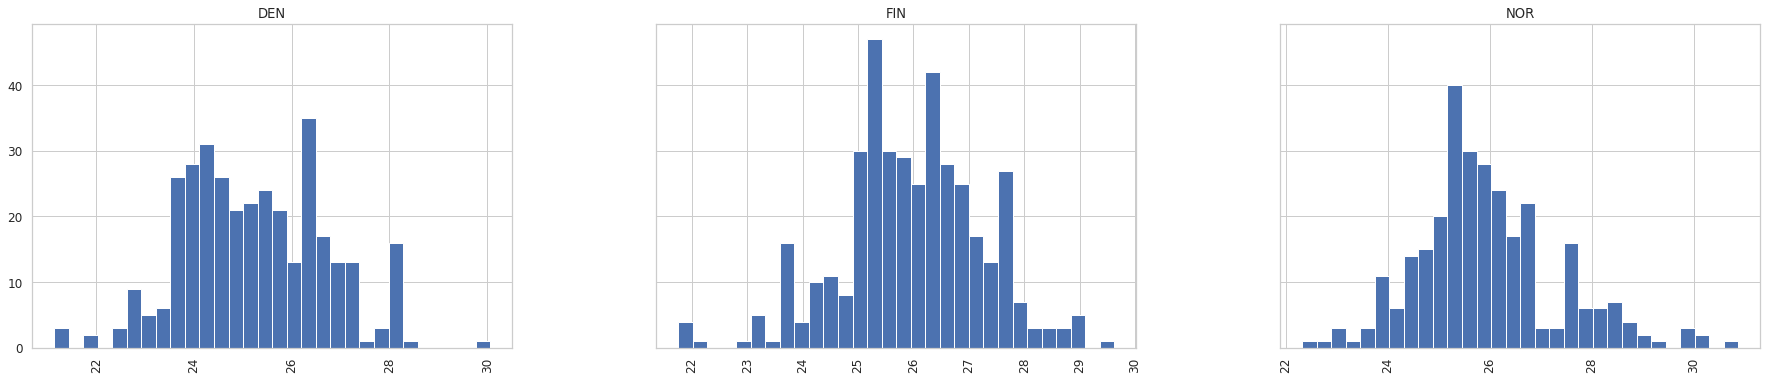

In [80]:
norway_bmi = data.query('country == "NOR"').bmi
finland_bmi = data.query('country == "FIN"').bmi
denmark_bmi = data.query('country == "DEN"').bmi

all_bmi = (norway_bmi, finland_bmi, denmark_bmi)
data.query('country in @countries')[['country', 'bmi']] \
    .hist(by='country', bins=30, figsize=(30, 6), 
          layout=(1, 3), sharey=True);

In [81]:
f_result = stats.f_oneway(*all_bmi)
print(H0 if alpha < f_result.pvalue else H1)

Различия в росте спортсменов статистически значимы
